# Повторение примеров

## Julia для науки о данных

### Считывание данных

In [1]:
using CSV, DataFrames, DelimitedFiles

# Считывание данных и их запись в структуру:
P = CSV.File("programminglanguages.csv") |> DataFrame
# Функция определения по названию языка программирования года его создания:
function language_created_year(P,language::String)
    loc = findfirst(P[:,2].==language)
    return P[loc,1]
end
# Пример вызова функции и определение даты создания языка Python:
language_created_year(P,"Python")
# Пример вызова функции и определение даты создания языка Julia:
language_created_year(P,"Julia")

2012

In [2]:
language_created_year(P,"julia")

LoadError: MethodError: no method matching getindex(::DataFrame, ::Nothing, ::Int64)

[0mClosest candidates are:
[0m  getindex(::DataFrame, [91m::typeof(!)[39m, ::Union{Signed, Unsigned})
[0m[90m   @[39m [36mDataFrames[39m [90mC:\Users\vemanaeva\.julia\packages\DataFrames\58MUJ\src\dataframe\[39m[90m[4mdataframe.jl:548[24m[39m
[0m  getindex(::DataFrame, [91m::Colon[39m, ::Union{AbstractString, Signed, Symbol, Unsigned})
[0m[90m   @[39m [36mDataFrames[39m [90mC:\Users\vemanaeva\.julia\packages\DataFrames\58MUJ\src\dataframe\[39m[90m[4mdataframe.jl:542[24m[39m
[0m  getindex(::DataFrame, [91m::InvertedIndex[39m, ::Union{AbstractString, Signed, Symbol, Unsigned})
[0m[90m   @[39m [36mDataFrames[39m [90mC:\Users\vemanaeva\.julia\packages\DataFrames\58MUJ\src\dataframe\[39m[90m[4mdataframe.jl:538[24m[39m
[0m  ...


In [3]:
# Функция определения по названию языка программирования года его создания (без учёта регистра):
function language_created_year_v2(P,language::String)
loc = findfirst(lowercase.(P[:,2]).==lowercase.(language))
return P[loc,1]
end
# Пример вызова функции и определение даты создания языка julia:
language_created_year_v2(P,"julia")

2012

In [4]:
# Построчное считывание данных с указанием разделителя:
Tx = readdlm("programminglanguages.csv", ',')

74×2 Matrix{Any}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

### Запись данных в файл

In [5]:
# Запись данных в CSV-файл:
CSV.write("programming_languages_data2.csv", P)

"programming_languages_data2.csv"

In [6]:
# Пример записи данных в текстовый файл с разделителем ',':
writedlm("programming_languages_data.txt", Tx, ',')

In [7]:
# Пример записи данных в текстовый файл с разделителем '-':
writedlm("programming_languages_data2.txt", Tx, '-')

In [8]:
# Построчное считывание данных с указанием разделителя:
P_new_delim = readdlm("programming_languages_data2.txt", '-')

74×2 Matrix{Any}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

### Словари

In [9]:
# Инициализация словаря:
dict = Dict{Integer,Vector{String}}()

Dict{Integer, Vector{String}}()

In [10]:
# Инициализация словаря:
dict2 = Dict()

Dict{Any, Any}()

In [11]:
# Заполнение словаря данными:
for i = 1:size(P,1)
    year,lang = P[i,:]
    if year in keys(dict)
        dict[year] = push!(dict[year],lang)
    else
        dict[year] = [lang]
    end
end
dict

Dict{Integer, Vector{String}} with 45 entries:
  1985 => ["Eiffel"]
  2002 => ["Scratch"]
  1952 => ["Autocode"]
  1963 => ["CPL"]
  1964 => ["Speakeasy", "BASIC", "PL/I"]
  1967 => ["BCPL"]
  2001 => ["C#", "D"]
  1991 => ["Python", "Visual Basic"]
  1957 => ["FORTRAN", "COMTRAN"]
  1988 => ["Tcl", "Wolfram Language "]
  1955 => ["FLOW-MATIC"]
  1951 => ["Regional Assembly Language"]
  1994 => ["CLOS "]
  2011 => ["Dart", "Kotlin", "Red", "Elixir"]
  1959 => ["FACT", "COBOL", "RPG"]
  1962 => ["APL", "Simula", "SNOBOL"]
  2005 => ["F#"]
  1969 => ["B"]
  1972 => ["C", "Smalltalk", "Prolog"]
  1997 => ["Rebol"]
  1986 => ["Objective-C", "LabVIEW ", "Erlang"]
  1993 => ["Lua", "R"]
  1958 => ["LISP", "ALGOL 58"]
  1987 => ["Perl"]
  1954 => ["IPL"]
  ⋮    => ⋮

In [12]:
# Пример определения в словаре языков программирования, созданных в 2003 году:
dict[2003]

2-element Vector{String}:
 "Groovy"
 "Scala"

### DataFrames

In [13]:
# Задаём переменную со структурой DataFrame:
df = DataFrame(year = P[:,1], language = P[:,2])
# Вывод всех значения столбца year:
df[!,:year]

73-element Vector{Int64}:
 1951
 1952
 1954
 1955
 1957
 1957
 1958
 1958
 1959
 1959
 1959
 1962
 1962
    ⋮
 2003
 2005
 2006
 2007
 2009
 2010
 2011
 2011
 2011
 2011
 2012
 2014

In [14]:
# Получение статистических сведений о фрейме:
describe(df)

2×7 DataFrame
 Row │ variable  mean     min       median  max        nmissing  eltype   
     │ Symbol    Union…   Any       Union…  Any        Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────
   1 │ year      1982.99  1951      1986.0  2014              0  Int64
   2 │ language           ALGOL 58          dBase III         0  String31

### RDatasets

In [15]:
# Подгружаем пакет RDatasets:
using RDatasets
# Задаём структуру данных в виде набора данных:
iris = dataset("datasets", "iris")

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
   9 │         4.4         2.9          1.4         0.2  setosa
  10 │         4.9         3.1          1.5         0.1  setosa
  11 │         5.4         3.7          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 141 │         6.7         3.1          5.6         2.4  virginica
 142 │         6.9         3.1          5.1         2.3  virginica
 143 │         5.8         2.7          5.1         1.9  virginica
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   129 rows omitted

In [16]:
# Определения типа переменной:
typeof(iris)

DataFrame

In [17]:
describe(iris)

5×7 DataFrame
 Row │ variable     mean     min     median  max        nmissing  eltype       ⋯
     │ Symbol       Union…   Any     Union…  Any        Int64     DataType     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ SepalLength  5.84333  4.3     5.8     7.9               0  Float64      ⋯
   2 │ SepalWidth   3.05733  2.0     3.0     4.4               0  Float64
   3 │ PetalLength  3.758    1.0     4.35    6.9               0  Float64
   4 │ PetalWidth   1.19933  0.1     1.3     2.5               0  Float64
   5 │ Species               setosa          virginica         0  CategoricalV ⋯
                                                                1 column omitted

### Работа с переменными отсутствующего типа (Missing Values)

In [18]:
# Отсутствующий тип:
a = missing
typeof(a)

Missing

In [19]:
# Пример операции с переменной отсутствующего типа:
a + 1

missing

In [20]:
# Определение перечня продуктов:
foods = ["apple", "cucumber", "tomato", "banana"]
# Определение калорий:
calories = [missing,47,22,105]

4-element Vector{Union{Missing, Int64}}:
    missing
  47
  22
 105

In [21]:
# Определение типа переменной:
typeof(calories)

Vector{Union{Missing, Int64}} (alias for Array{Union{Missing, Int64}, 1})

In [22]:
# Подключаем пакет Statistics:
using Statistics
# Определение среднего значения:
mean(calories)

missing

In [23]:
# Определение среднего значения без значений с отсутствующим типом:
mean(skipmissing(calories))

58.0

In [24]:
# Задание сведений о ценах:
prices = [0.85,1.6,0.8,0.6]
# Формирование данных о калориях:
dataframe_calories = DataFrame(item=foods,calories=calories)
# Формирование данных о ценах:
dataframe_prices = DataFrame(item=foods,price=prices)
# Объединение данных о калориях и ценах:
DF = innerjoin(dataframe_calories,dataframe_prices,on=:item)

4×3 DataFrame
 Row │ item      calories  price   
     │ String    Int64?    Float64 
─────┼─────────────────────────────
   1 │ apple      missing     0.85
   2 │ cucumber        47     1.6
   3 │ tomato          22     0.8
   4 │ banana         105     0.6

### FileIO

In [25]:
# Подключаем пакет FileIO:
using FileIO
using ImageIO
# Загрузка изображения:
X1 = load("julialogo.png")

250×400 Array{RGBA{N0f8},2} with eltype ColorTypes.RGBA{FixedPointNumbers.N0f8}:
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 ⋮                            ⋱  
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)   

In [26]:
# Определение типа и размера данных:
@show typeof(X1);
@show size(X1);

typeof(X1) = Matrix{ColorTypes.RGBA{FixedPointNumbers.N0f8}}
size(X1) = (250, 400)


## Обработка данных: стандартные алгоритмы машинного обучения в Julia

### Кластеризация данных. Метод k-средних

In [27]:
using Plots
# Загрузка данных:
houses = CSV.File("houses.csv") |> DataFrame

985×12 DataFrame
 Row │ street                           city             zip    state    beds  ⋯
     │ String                           String15         Int64  String3  Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 3526 HIGH ST                     SACRAMENTO       95838  CA           2 ⋯
   2 │ 51 OMAHA CT                      SACRAMENTO       95823  CA           3
   3 │ 2796 BRANCH ST                   SACRAMENTO       95815  CA           2
   4 │ 2805 JANETTE WAY                 SACRAMENTO       95815  CA           2
   5 │ 6001 MCMAHON DR                  SACRAMENTO       95824  CA           2 ⋯
   6 │ 5828 PEPPERMILL CT               SACRAMENTO       95841  CA           3
   7 │ 6048 OGDEN NASH WAY              SACRAMENTO       95842  CA           3
   8 │ 2561 19TH AVE                    SACRAMENTO       95820  CA           3
   9 │ 11150 TRINITY RIVER DR Unit 114  RANCHO CORDOVA   95670  CA           2 ⋯
  10 │ 7325 10TH ST                     RIO LINDA        95673  CA           3
  11 │ 645 MORRISON AVE                 SACRAMENTO       95838  CA           3
  ⋮  │                ⋮                        ⋮           ⋮       ⋮       ⋮   ⋱
 976 │ 5024 CHAMBERLIN CIR              ELK GROVE        95757  CA           3
 977 │ 2400 INVERNESS DR                LINCOLN          95648  CA           3 ⋯
 978 │ 5 BISHOPGATE CT                  SACRAMENTO       95823  CA           4
 979 │ 5601 REXLEIGH DR                 SACRAMENTO       95823  CA           4
 980 │ 1909 YARNELL WAY                 ELK GROVE        95758  CA           3
 981 │ 9169 GARLINGTON CT               SACRAMENTO       95829  CA           4 ⋯
 982 │ 6932 RUSKUT WAY                  SACRAMENTO       95823  CA           3
 983 │ 7933 DAFFODIL WAY                CITRUS HEIGHTS   95610  CA           3
 984 │ 8304 RED FOX WAY                 ELK GROVE        95758  CA           4
 985 │ 3882 YELLOWSTONE LN              EL DORADO HILLS  95762  CA           3 ⋯
                                                  7 columns and 964 rows omitted

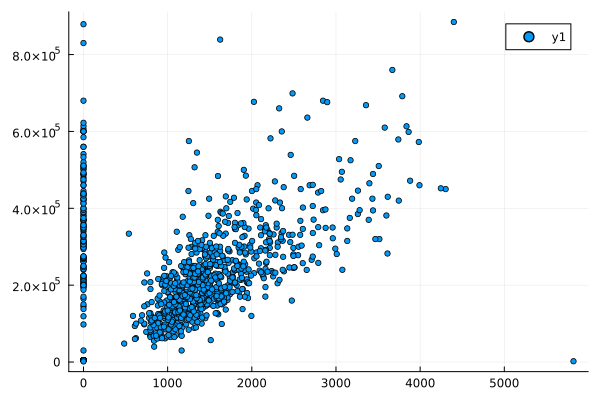

In [28]:
plot(size=(500,500),leg=false)
x = houses[!,:sq__ft]
y = houses[!,:price]
scatter(x,y,markersize=3)

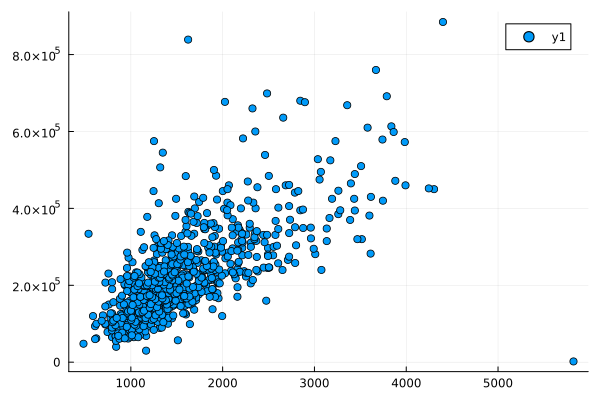

In [29]:
# Фильтрация данных по заданному условию:
filter_houses = houses[houses[!,:sq__ft].>0,:]
# Построение графика:
x = filter_houses[!,:sq__ft]
y = filter_houses[!,:price]
scatter(x,y)

In [30]:
# Определение средней цены для определённого типа домов:
by(filter_houses,:type,filter_houses->mean(filter_houses[!,:price]))

LoadError: ArgumentError: by function was removed from DataFrames.jl. Use the `combine(groupby(...), ...)` or `combine(f, groupby(...))` instead.

In [31]:
combine(filter_houses->mean(filter_houses[!,:price]), groupby(filter_houses,:type))

3×2 DataFrame
 Row │ type          x1        
     │ String15      Float64   
─────┼─────────────────────────
   1 │ Residential   2.34802e5
   2 │ Condo         1.34213e5
   3 │ Multi-Family  2.24535e5

In [32]:
using Clustering
# Добавление данных :latitude и :longitude в новый фрейм:
X = filter_houses[:, [:latitude,:longitude]]

814×2 DataFrame
 Row │ latitude  longitude 
     │ Float64   Float64   
─────┼─────────────────────
   1 │  38.6319   -121.435
   2 │  38.4789   -121.431
   3 │  38.6183   -121.444
   4 │  38.6168   -121.439
   5 │  38.5195   -121.436
   6 │  38.6626   -121.328
   7 │  38.6817   -121.352
   8 │  38.5351   -121.481
   9 │  38.6212   -121.271
  10 │  38.7009   -121.443
  11 │  38.6377   -121.452
  ⋮  │    ⋮          ⋮
 805 │  38.3898   -121.446
 806 │  38.8978   -121.325
 807 │  38.4679   -121.445
 808 │  38.4453   -121.442
 809 │  38.4174   -121.484
 810 │  38.4577   -121.36
 811 │  38.4999   -121.459
 812 │  38.7088   -121.257
 813 │  38.417    -121.397
 814 │  38.6552   -121.076
           793 rows omitted

In [33]:
# Конвертация данных в матричный вид:
X = Matrix(X[:, 1:2])

814×2 Matrix{Float64}:
 38.6319  -121.435
 38.4789  -121.431
 38.6183  -121.444
 38.6168  -121.439
 38.5195  -121.436
 38.6626  -121.328
 38.6817  -121.352
 38.5351  -121.481
 38.6212  -121.271
 38.7009  -121.443
 38.6377  -121.452
 38.4707  -121.459
 38.6187  -121.436
  ⋮       
 38.7035  -121.375
 38.7031  -121.235
 38.3898  -121.446
 38.8978  -121.325
 38.4679  -121.445
 38.4453  -121.442
 38.4174  -121.484
 38.4577  -121.36
 38.4999  -121.459
 38.7088  -121.257
 38.417   -121.397
 38.6552  -121.076

In [34]:
# Транспонирование матрицы с данными:
X = X'
# Задание количества кластеров:
k = length(unique(filter_houses[!,:zip]))
# Определение k-среднего:
C = kmeans(X,k)

KmeansResult{Matrix{Float64}, Float64, Int64}([38.592891 38.82144544444444 … 38.779435 38.811719; -121.40023805555555 -121.27014177777775 … -121.146676 -121.21894424999999], [50, 7, 50, 50, 39, 11, 41, 40, 5, 38  …  51, 47, 7, 64, 21, 63, 23, 6, 35, 25], [0.00015710817388026044, 0.00044116201024735346, 0.00035021260555367917, 0.00045296605458133854, 0.00014347853721119463, 0.00019318724662298337, 0.0002844007576641161, 0.0003372956780367531, 1.144897032645531e-5, 0.00011686658399412408  …  5.860410237801261e-5, 5.241325561655685e-5, 9.496071652392857e-5, 0.00023885654809419066, 0.00014578503396478482, 0.00015253095989464782, 0.00016121321459650062, 0.0005586109509749804, 0.0002339670536457561, 0.00011298271056148224], [18, 9, 3, 6, 9, 15, 25, 1, 20, 19  …  19, 21, 1, 1, 4, 11, 21, 34, 1, 4], [18, 9, 3, 6, 9, 15, 25, 1, 20, 19  …  19, 21, 1, 1, 4, 11, 21, 34, 1, 4], 0.19877048672788078, 13, true)

In [35]:
# Формирование фрейма данных:
df = DataFrame(cluster = C.assignments,city = filter_houses[!,:city], latitude = filter_houses[!,:latitude],longitude = filter_houses[!,:longitude],zip = filter_houses[!,:zip])

814×5 DataFrame
 Row │ cluster  city             latitude  longitude  zip   
     │ Int64    String15         Float64   Float64    Int64 
─────┼──────────────────────────────────────────────────────
   1 │      50  SACRAMENTO        38.6319   -121.435  95838
   2 │       7  SACRAMENTO        38.4789   -121.431  95823
   3 │      50  SACRAMENTO        38.6183   -121.444  95815
   4 │      50  SACRAMENTO        38.6168   -121.439  95815
   5 │      39  SACRAMENTO        38.5195   -121.436  95824
   6 │      11  SACRAMENTO        38.6626   -121.328  95841
   7 │      41  SACRAMENTO        38.6817   -121.352  95842
   8 │      40  SACRAMENTO        38.5351   -121.481  95820
   9 │       5  RANCHO CORDOVA    38.6212   -121.271  95670
  10 │      38  RIO LINDA         38.7009   -121.443  95673
  11 │      50  SACRAMENTO        38.6377   -121.452  95838
  ⋮  │    ⋮            ⋮            ⋮          ⋮        ⋮
 805 │      51  ELK GROVE         38.3898   -121.446  95757
 806 │      47  LINCOLN           38.8978   -121.325  95648
 807 │       7  SACRAMENTO        38.4679   -121.445  95823
 808 │      64  SACRAMENTO        38.4453   -121.442  95823
 809 │      21  ELK GROVE         38.4174   -121.484  95758
 810 │      63  SACRAMENTO        38.4577   -121.36   95829
 811 │      23  SACRAMENTO        38.4999   -121.459  95823
 812 │       6  CITRUS HEIGHTS    38.7088   -121.257  95610
 813 │      35  ELK GROVE         38.417    -121.397  95758
 814 │      25  EL DORADO HILLS   38.6552   -121.076  95762
                                            793 rows omitted

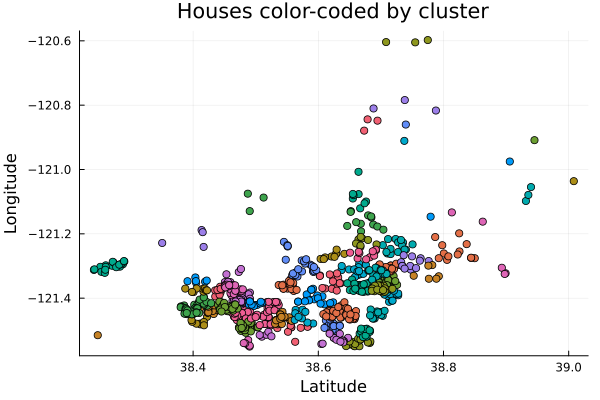

In [36]:
clusters_figure = plot(legend = false)
for i = 1:k
clustered_houses = df[df[!,:cluster].== i,:]
xvals = clustered_houses[!,:latitude]
yvals = clustered_houses[!,:longitude]
scatter!(clusters_figure,xvals,yvals,markersize=4)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by cluster")
display(clusters_figure)

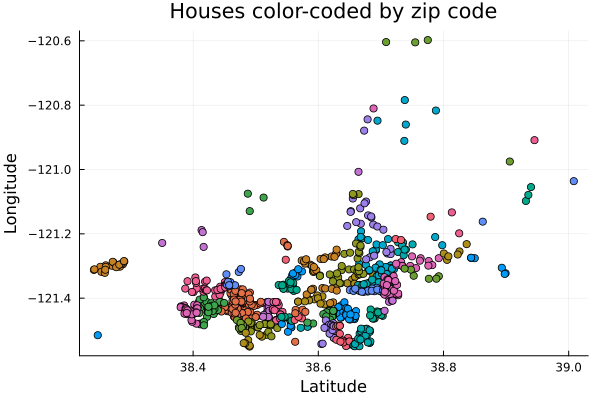

In [37]:
unique_zips = unique(filter_houses[!,:zip])
zips_figure = plot(legend = false)
for uzip in unique_zips
subs = filter_houses[filter_houses[!,:zip].==uzip,:]
x = subs[!,:latitude]
y = subs[!,:longitude]
scatter!(zips_figure,x,y)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by zip code")
display(zips_figure)

### Кластеризация данных. Метод k ближайших соседей

In [58]:
using NearestNeighbors
knearest = 9
id = 70
point = X[:,id]
# Поиск ближайших соседей:
kdtree = KDTree(X)
idxs, dists = knn(kdtree, point, knearest, true)
# Все объекты недвижимости:
x = filter_houses[!,:latitude];
y = filter_houses[!,:longitude];
scatter(x,y)
# Соседи:
x = filter_houses[idxs,:latitude];
y = filter_houses[idxs,:longitude];
scatter!(x,y)

LoadError: BoundsError: attempt to access 100-element Vector{Float64} at index [1:100, 70]

In [39]:
# Фильтрация по районам соседних домов:
cities = filter_houses[idxs,:city]

15-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "SACRAMENTO"
 "ELK GROVE"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"
 "SACRAMENTO"
 "SACRAMENTO"
 "ELK GROVE"
 "SACRAMENTO"
 "ELK GROVE"

### Обработка данных. Метод главных компонент

In [40]:
# Фрейм с указанием площади и цены недвижимости:
F = filter_houses[!,[:sq__ft,:price]]
# Конвертация данных в массив:
F = Array{Float64,2}(F)'
# Подключение пакета MultivariateStats:
using MultivariateStats
# Приведение типов данных к распределению для PCA:
M = fit(PCA, F)
# Выделение значений главных компонент в отдельную переменную:
Xr = reconstruct(M, y)
# Построение графика с выделением главных компонент:
scatter(F[1,:],F[2,:])
scatter!(Xr[1,:],Xr[2,:])

LoadError: DimensionMismatch: second dimension of A, 1, does not match length of x, 15

### Обработка данных. Линейная регрессия

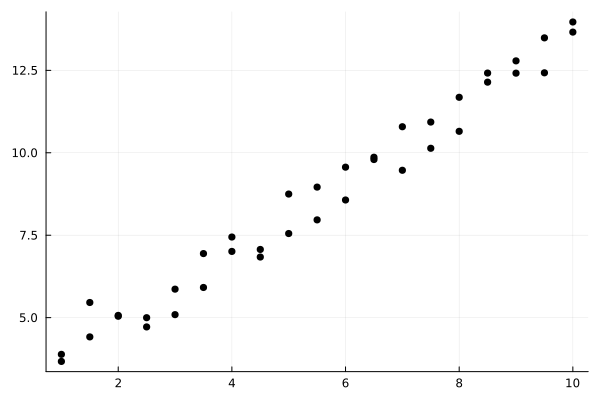

In [41]:
xvals = repeat(1:0.5:10,inner=2)
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1
scatter(xvals,yvals,color=:black,leg=false)

In [42]:
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
return a,b
end

find_best_fit (generic function with 1 method)

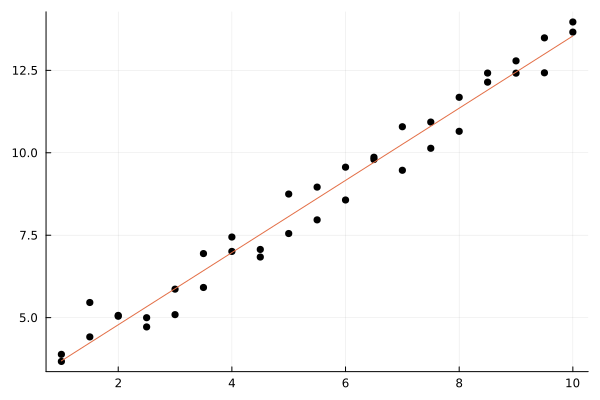

In [43]:
a,b = find_best_fit(xvals,yvals)
ynew = a * xvals .+ b
plot!(xvals,ynew)

In [44]:
xvals = 1:100000;
xvals = repeat(xvals,inner=3);
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1;
@show size(xvals)
@show size(yvals)
@time a,b = find_best_fit(xvals,yvals)

size(xvals) = (300000,)
size(yvals) = (300000,)
  0.046465 seconds (23.13 k allocations: 1.507 MiB, 96.37% compilation time)


(0.9999999698626795, 3.002092171111144)

In [45]:
using PyCall
using Conda
py"""
import numpy
def find_best_fit_python(xvals,yvals):
    meanx = numpy.mean(xvals)
    meany = numpy.mean(yvals)
    stdx = numpy.std(xvals)
    stdy = numpy.std(yvals)
    r = numpy.corrcoef(xvals,yvals)[0][1]
    a = r*stdy/stdx
    b = meany - a*meanx
return a,b
"""
xpy = PyObject(xvals)
ypy = PyObject(yvals)
@time a,b = find_best_fit_python(xpy,ypy)

LoadError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\vemanaeva\.julia\packages\PyCall\ilqDX\src\pyeval.jl:34 =# @pysym(:Py_CompileString), PyPtr, (Cstring, Cstring, Cint), s, fname, input_type))))) <class 'SyntaxError'>
SyntaxError("'return' outside function", ('C:\\Users\\vemanaeva\\.julia\\packages\\PyCall\\ilqDX\\src\\pyeval.jl', 10, 1, '            return PyDict{String,PyObject,true}(pyincref(@pycheckn ccall((@pysym :PyModule_GetDict), PyPtr, (PyPtr,), pyimport("__main__"))))\n', 10, 11))


In [46]:
using BenchmarkTools
@btime a,b = find_best_fit_python(xvals,yvals)
@btime a,b = find_best_fit(xvals,yvals)

LoadError: UndefVarError: `find_best_fit_python` not defined

# Самостоятельная работа

## Кластеризация

Используйте Clustering.jl для кластеризации на основе k-средних. Сделайте точечную диаграмму полученных кластеров.
Подсказка: вам нужно будет проиндексировать фрейм данных, преобразовать его в массив и транспонировать.

In [47]:
using GLM

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       6.126000e+01
      1       3.057978e+01      -3.068022e+01 |        9
      2       2.924072e+01      -1.339056e+00 |        5
      3       2.878060e+01      -4.601246e-01 |        5
      4       2.844304e+01      -3.375534e-01 |        6
      5       2.790353e+01      -5.395143e-01 |        5
      6       2.773597e+01      -1.675615e-01 |        2
      7       2.768041e+01      -5.555850e-02 |        2
      8       2.764938e+01      -3.102848e-02 |        0
      9       2.764938e+01       0.000000e+00 |        0
K-means converged with 9 iterations (objv = 27.649381539513328)


KmeansResult{Matrix{Float64}, Float64, Int64}([6.633333333333334 5.242857142857143 … 5.8428571428571425 4.704545454545454; 3.033333333333333 3.6678571428571423 … 2.8476190476190473 3.122727272727273; 4.633333333333333 1.5 … 4.314285714285714 1.4136363636363638; 1.4583333333333337 0.28214285714285714 … 1.3238095238095238 0.2000000000000001], [2, 10, 10, 10, 2, 2, 10, 2, 10, 10  …  4, 4, 7, 4, 4, 4, 7, 4, 4, 7], [0.06533163265306996, 0.05345041322314614, 0.018904958677694594, 0.018904958677680384, 0.08033163265305632, 0.1324744897959107, 0.0979958677686028, 0.13747448979592036, 0.14254132231404526, 0.05617768595041639  …  0.07306122448980545, 0.3082993197278938, 0.0807756232686927, 0.21972789115645242, 0.1863945578231494, 0.15115646258502125, 0.12603878116343026, 0.15448979591837997, 0.2421088435374088, 0.11603878116341093], [12, 28, 6, 21, 1, 13, 19, 7, 21, 22], [12, 28, 6, 21, 1, 13, 19, 7, 21, 22], 27.649381539513328, 9, true)

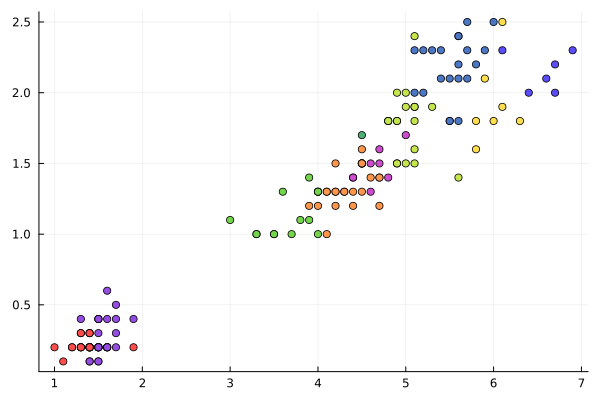

In [48]:
iris = dataset("datasets", "iris")
select!(iris, Not(:Species))
X = Matrix(iris)
X = X'

result = kmeans(X, 10, maxiter=10, display=:iter)
display(result)

scatter(iris.PetalLength, iris.PetalWidth, marker_z=result.assignments, color=:lightrainbow, legend=false)

## Регрессия (метод наименьших квадратов в случае линейной регрессии)

Часть 1.

Для самостоятельного решения необходимо добавить колонку единиц и решить СЛАУ, где матрица $X$ с добавленной колонкой единиц является матрицей коэффициентов, а вектор $y$ --- вектором ответов. Колонка единиц добавляется для того, чтобы решение ограничивалось исключительно линейными случаями (так как производная линейной функции равна 1).

In [49]:
X = randn(1000, 3)
a0 = rand(3)
y = X * a0 + 0.1 * randn(1000)

1000-element Vector{Float64}:
  0.03043995123293436
 -1.953388854942908
 -0.8009099489922488
 -1.3096136786537453
 -1.2327052768713833
 -0.8798051118624094
 -0.15614166712880176
  1.1846998320465265
  0.6830760624488098
 -0.18229872717754655
  2.12978696518084
 -0.6876334726910286
 -0.19114477894103088
  ⋮
  1.222393590949515
  0.2514667529248124
  0.623891507054712
 -1.157403946249582
  0.11388243549204946
  1.590115874436792
  0.022201987682218184
 -0.2363163642111726
 -1.0964016939917989
  0.857005806848278
  0.2966166737587381
 -0.40051933250714544

In [50]:
N = 1000
X2 = hcat(ones(N), X)

1000×4 Matrix{Float64}:
 1.0   0.850931     0.402163    -1.18408
 1.0  -0.951794    -1.271       -2.2006
 1.0  -1.48207     -0.494146    -0.432065
 1.0   0.698347    -1.45334      0.219026
 1.0   0.779842    -1.0361      -1.20528
 1.0   0.672882    -0.989195    -0.276471
 1.0  -0.849324    -0.564242     1.79626
 1.0  -0.989228     1.12671      0.440338
 1.0  -0.681773     0.739576     0.0943032
 1.0   0.168323    -0.367929     0.342762
 1.0   0.820697     1.97334     -0.168936
 1.0   1.03281     -0.827445     0.310016
 1.0   0.74557      0.00464779  -0.530643
 ⋮                              
 1.0   0.122312     1.57516     -1.09872
 1.0  -0.635727     0.0453458    0.946578
 1.0   0.00990305   0.647238     0.32321
 1.0   0.114833    -1.30667      0.425474
 1.0   0.087562    -0.389147     0.988681
 1.0  -0.155278     1.65548      0.17518
 1.0   0.612878    -0.212042     0.57317
 1.0  -0.747207    -0.708934     1.84762
 1.0  -0.0134176   -1.22432      0.635842
 1.0  -0.239539     1.20186 

In [51]:
betahat1 = X2 \ y
yp = X2 * betahat1
mse1 = sqrt(sum(abs2.(y - yp)) / N)
display(betahat1)
mse1

4-element Vector{Float64}:
 -0.0051924942922954255
  0.14280117993330707
  0.9940348117978217
  0.3170968280538295

0.10153032637671984

In [52]:
betahat2 = llsq(X, y; bias=false)
yp = X * betahat2
mse2 = sqrt(sum(abs2.(y - yp)) / N)
display(betahat2)
mse2

3-element Vector{Float64}:
 0.1428045314564559
 0.9938968412624087
 0.3169095523460852

0.10166275556703575

In [53]:
X3 = DataFrame(a=y, b=X[:,1], c=X[:,2], d=X[:,3])
lmMSE = lm(@formula(a ~ b + c + d), X3)
betahat3 = GLM.coeftable(lmMSE).cols[1]
yp = X2 * betahat3
mse3 = sqrt(sum(abs2.(y - yp)) / N)
display(betahat3)
mse3

4-element Vector{Float64}:
 -0.005192494292295441
  0.14280117993330696
  0.9940348117978216
  0.3170968280538297

0.10153032637671984

Часть 2.

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
─────────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────
x1  0.043767   0.0217095   2.02    0.0465  0.000685208  0.0868487
x2  1.92806    0.0361833  53.29    <1e-73  1.85625      1.99986
─────────────────────────────────────────────────────────────────


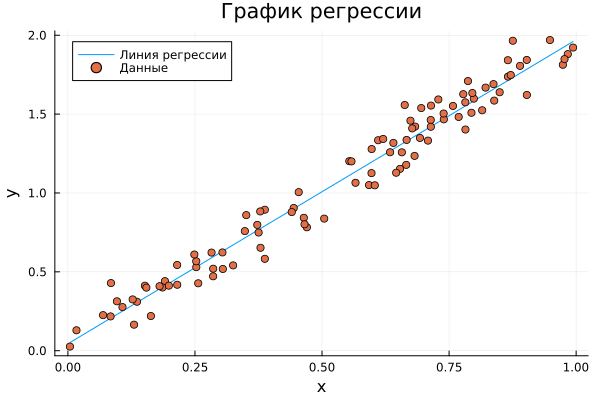

In [54]:
X = rand(100)
y = 2X + 0.1 * randn(100)
Xh = hcat(ones(100), X)
lm2 = fit(LinearModel, Xh, y)
display(lm2)

Plots.plot(title="График регрессии", xlabel="x", ylabel="y", legend=:topleft)
Plots.plot!(X, predict(lm2), label="Линия регрессии")
Plots.scatter!(X, y, label="Данные")

## Модель ценообразования биномиальных опционов

Пункты $a$ и $d$.

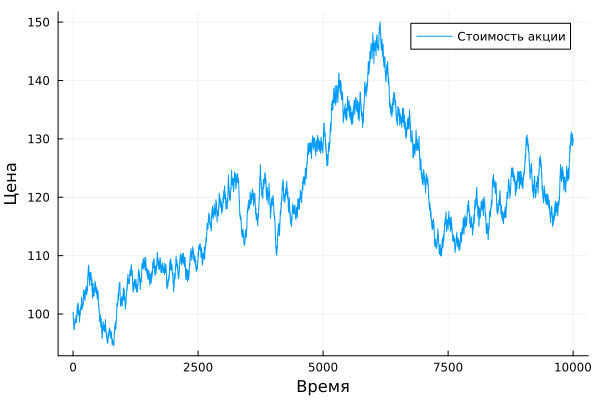

In [55]:
function binomial_stock_price(S, T, n, sigma, r)
    h = T/n
    u = exp(r * h + sigma * sqrt(h))
    d = exp(r * h - sigma * sqrt(h))
    p = (exp(r * h) - d) / (u - d)
    stock_prices = zeros(n+1)
    stock_prices[1] = S
    for i in 2:n+1
        epsilon = rand()
        if epsilon > 0.5
            stock_prices[i] = stock_prices[i-1]*u
        else
            stock_prices[i] = stock_prices[i-1]*d
        end
    end
    return stock_prices
end

S, T, n, sigma, r = 100.0, 1.0, 10000, 0.3, 0.08
stock_prices = binomial_stock_price(S, T, n, sigma, r)

plot(stock_prices, xlabel="Время", ylabel="Цена", label="Стоимость акции")

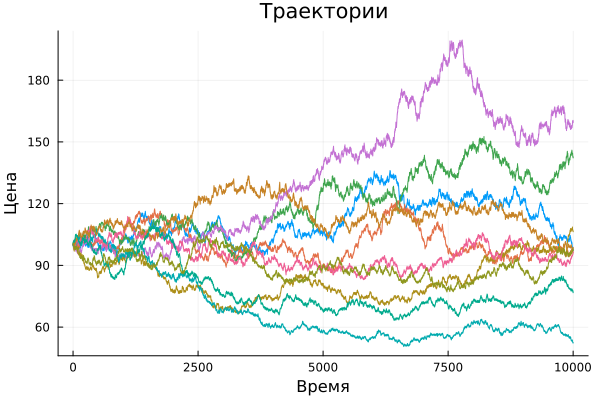

In [56]:
function createPath(S::Float64, r::Float64, sigma::Float64, T::Float64, n::Int64)
    dt = T / n
    path = [S]
    
    for i in 1:n
        epsilon = randn()
        S = S * exp((r - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * epsilon)
        push!(path, S)
    end
    return path
end

paths = [createPath(S, r, sigma, T, n) for i in 1:10]
plot(paths, title="Траектории", xlabel="Время", ylabel="Цена", legend=false)

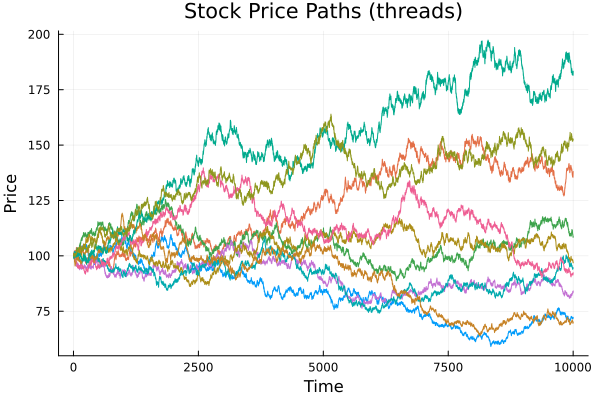

In [57]:
using Random
using Base.Threads

paths2 = []
@threads for i = 1:10
    push!(paths2, createPath(S, r, sigma, T, n))
end

plot(paths2, title="Stock Price Paths (threads)", xlabel="Time", ylabel="Price", legend=false)